In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from scipy import stats
from scipy.special import boxcox1p
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DG_out.csv',dtype={0:'object',1:'int64',2:'int64',3:'float64',4:'float64',5:'float64',6:'float64',7:'float64',8:'int64',9:'int64',10:'int64',11:'int64',12:'int64'})

In [3]:
pd.options.display.float_format = '{:.3f}'.format
o_df = df.iloc[:,1:8]
o_df.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc
count,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000
mean,2.149,2.149,54.842,54.842,109.683,49.240,28.771
std,7.421,4.512,1303.303,1301.473,2602.527,972.921,712.557
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,2.000,0.100,0.099,0.206,0.064,0.050
50%,1.000,2.000,0.932,0.959,1.965,0.535,0.490
75%,2.000,2.000,8.592,9.064,18.400,5.614,4.519
max,1932.000,1322.000,550000.000,500020.700,1050000.000,499259.588,500000.000


In [4]:
def plot_distributions(df):
    num_plots = min(6, len(df.columns)) 
    num_rows = (num_plots + 1) // 2
    num_cols = min(num_plots, 2) 
    bins = 200
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
    for i in range(num_rows):
        for j in range(num_cols):
            if (i * num_cols + j) < num_plots:
                c = i * num_cols + j
                ax[i][j].hist(df.iloc[:, c], bins=bins, alpha=0.9, log=True, density=True)
                ax[i][j].set_title(df.columns[c])
                ax[i][j].grid()
    plt.tight_layout()
    plt.show()


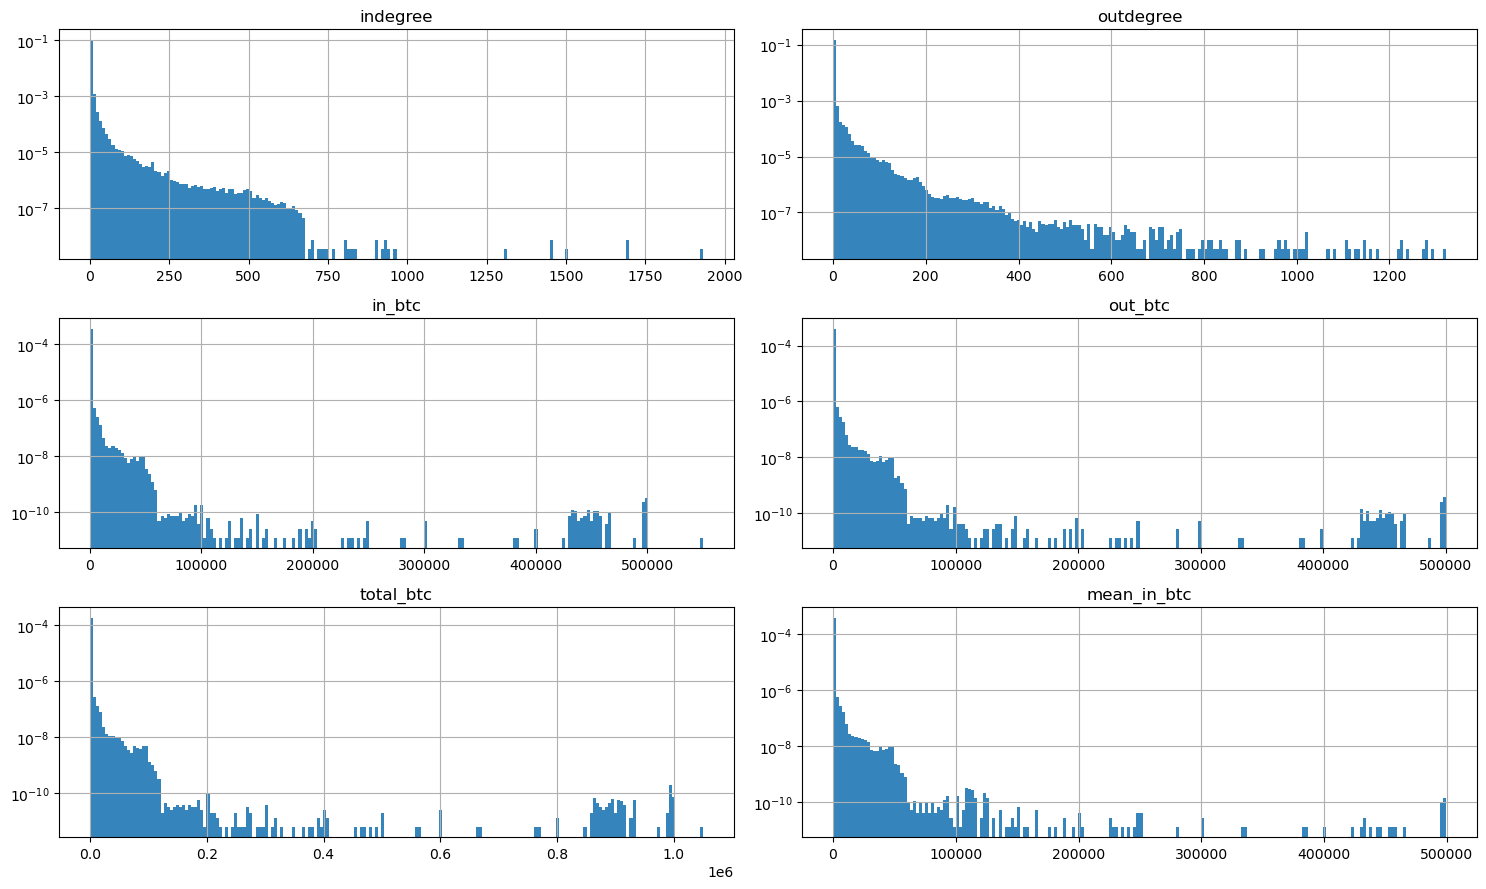

In [5]:
plot_distributions(o_df)

In [6]:
scaled_data = o_df.copy()
scaled_data = scaled_data.apply(lambda x: round(x, 3))  # Round all float values to 3 decimal places


# Scale

In [7]:
import heapq
rp_indegree = heapq.nsmallest(2, set(scaled_data.indegree))[1]/2
print("Indegree RP: "+ str(rp_indegree))
rp_outdegree = heapq.nsmallest(2, set(scaled_data.outdegree))[1]/2
print("Outdegree RP: "+ str(rp_outdegree))
rp_in_btc = heapq.nsmallest(2, set(scaled_data.in_btc))[1]/2
print("In_BTC RP: "+ str(rp_in_btc))
rp_out_btc = heapq.nsmallest(2, set(scaled_data.out_btc))[1]/2
print("Out_BTC RP: "+ str(rp_out_btc))
rp_total_btc = heapq.nsmallest(2, set(scaled_data.total_btc))[1]/2
print("Total_BTC RP: "+ str(rp_total_btc))
rp_mean_in_btc = heapq.nsmallest(2, set(scaled_data.mean_in_btc))[1]/2
print("Mean_In_BTC RP: "+ str(rp_mean_in_btc))
rp_mean_out_btc = heapq.nsmallest(2, set(scaled_data.mean_out_btc))[1]/2
print("Mean_Out_BTC RP: "+ str(rp_mean_out_btc))

Indegree RP: 0.5
Outdegree RP: 0.5
In_BTC RP: 0.0005
Out_BTC RP: 0.0005
Total_BTC RP: 0.0005
Mean_In_BTC RP: 0.0005
Mean_Out_BTC RP: 0.0005


In [8]:
scaled_data['indegree'].replace(0, rp_indegree, inplace=True)
scaled_data['outdegree'].replace(0, rp_outdegree, inplace=True)
scaled_data['in_btc'].replace(0, rp_in_btc, inplace=True)
scaled_data['out_btc'].replace(0, rp_out_btc, inplace=True)
scaled_data['total_btc'].replace(0, rp_total_btc, inplace=True)
scaled_data['mean_in_btc'].replace(0, rp_mean_in_btc, inplace=True)
scaled_data['mean_out_btc'].replace(0, rp_mean_out_btc, inplace=True)

scaled_data.describe()


,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc
count,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000
mean,2.153,2.152,54.842,54.842,109.683,49.240,28.771
std,7.420,4.511,1303.303,1301.473,2602.527,972.921,712.557
min,0.500,0.500,0.001,0.001,0.001,0.001,0.001
25%,1.000,2.000,0.100,0.099,0.206,0.064,0.050
50%,1.000,2.000,0.932,0.959,1.965,0.535,0.490
75%,2.000,2.000,8.592,9.064,18.400,5.614,4.519
max,1932.000,1322.000,550000.000,500020.700,1050000.000,499259.588,500000.000


In [9]:
scaled_data['indegree'] = np.log(scaled_data['indegree'])
scaled_data['outdegree'] = np.log(scaled_data['outdegree'])
scaled_data['in_btc'] = np.log(scaled_data['in_btc'])
scaled_data['out_btc'] = np.log(scaled_data['out_btc'])
scaled_data['total_btc'] = np.log(scaled_data['total_btc'])
scaled_data['mean_in_btc'] = np.log(scaled_data['mean_in_btc'])
scaled_data['mean_out_btc'] = np.log(scaled_data['mean_out_btc'])

scaled_data.describe()


,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc
count,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000
mean,0.384,0.637,-0.101,-0.076,0.672,-0.490,-0.717
std,0.640,0.366,2.917,2.926,2.851,2.964,2.903
min,-0.693,-0.693,-7.601,-7.601,-7.601,-7.601,-7.601
25%,0.000,0.693,-2.303,-2.313,-1.580,-2.749,-2.996
50%,0.000,0.693,-0.070,-0.042,0.675,-0.625,-0.713
75%,0.693,0.693,2.151,2.204,2.912,1.725,1.508
max,7.566,7.187,13.218,13.122,13.864,13.121,13.122


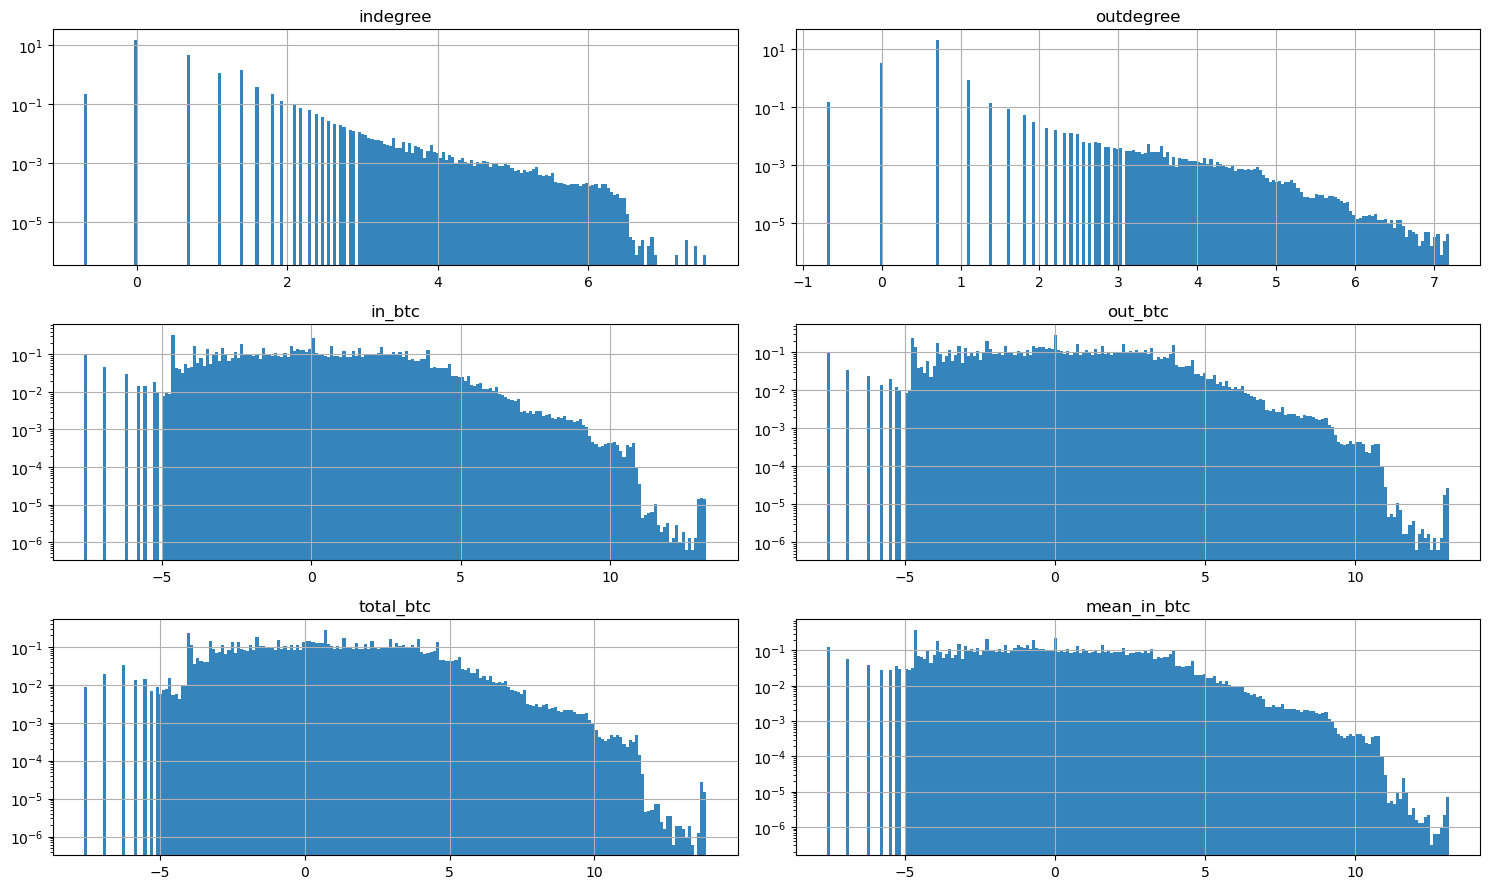

In [10]:
plot_distributions(scaled_data)

# Normalize

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = pd.DataFrame(scaler.fit_transform(scaled_data), columns=scaled_data.columns)

scaled_data.describe()


,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc
count,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000
mean,0.130,0.169,0.360,0.363,0.385,0.343,0.332
std,0.078,0.046,0.140,0.141,0.133,0.143,0.140
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.084,0.176,0.254,0.255,0.281,0.234,0.222
50%,0.084,0.176,0.362,0.365,0.386,0.337,0.332
75%,0.168,0.176,0.468,0.473,0.490,0.450,0.440
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


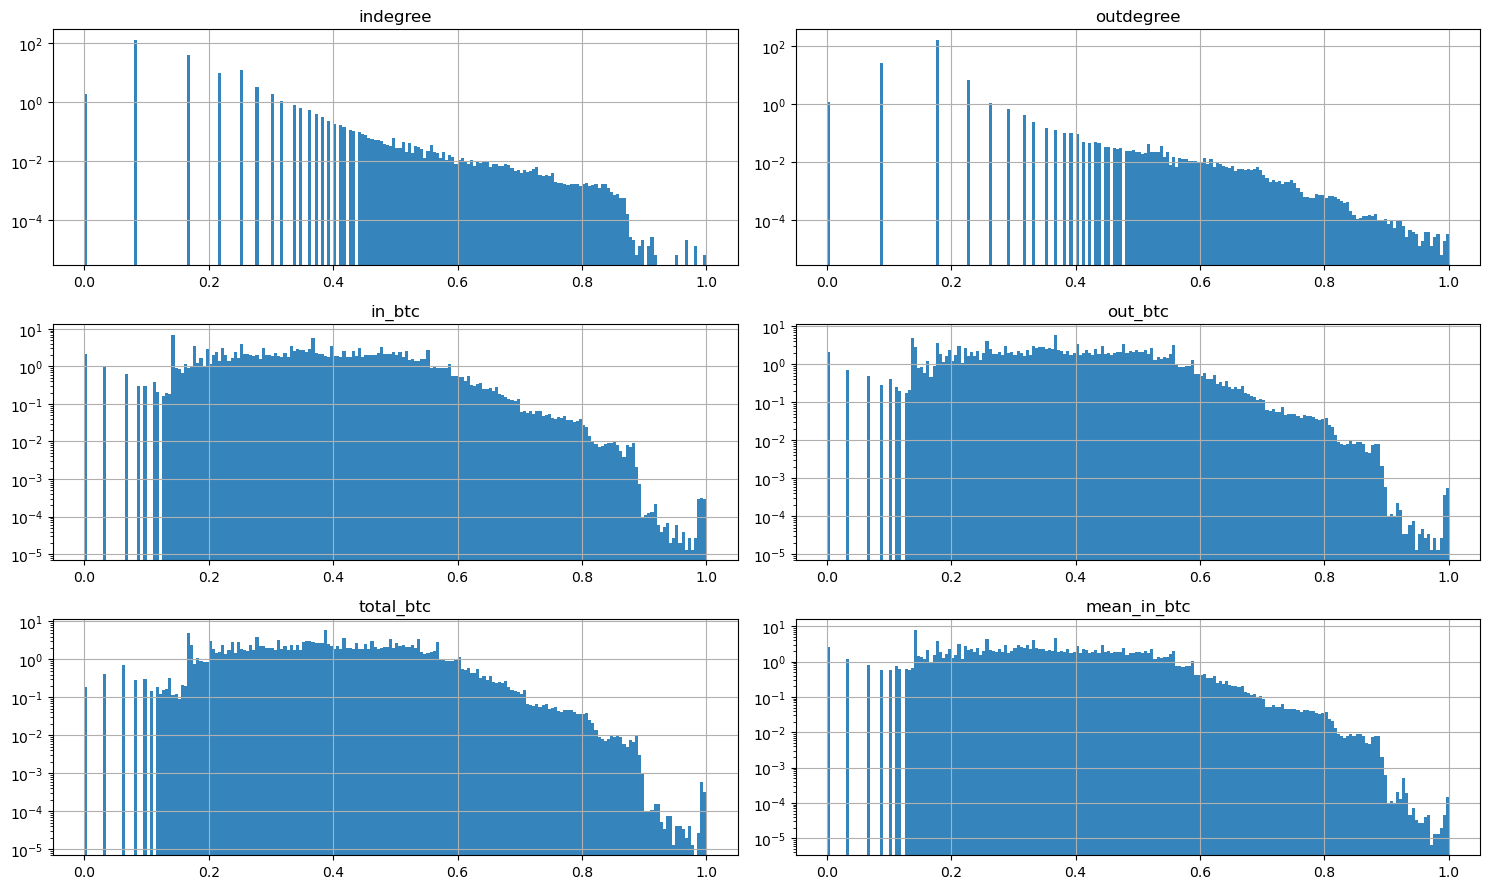

In [12]:
plot_distributions(scaled_data)

In [13]:
scaled_data['is_malicious'] = df['out_and_tx_malicious']
scaled_data.head(5)

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,is_malicious
0,0.000,0.088,0.000,0.556,0.536,0.000,0.556,0
1,0.084,0.176,0.553,0.556,0.569,0.556,0.522,0
2,0.084,0.088,0.476,0.478,0.494,0.478,0.478,0
3,0.084,0.088,0.542,0.531,0.552,0.545,0.531,0
4,0.084,0.176,0.528,0.531,0.545,0.531,0.497,0


# Class Distribution

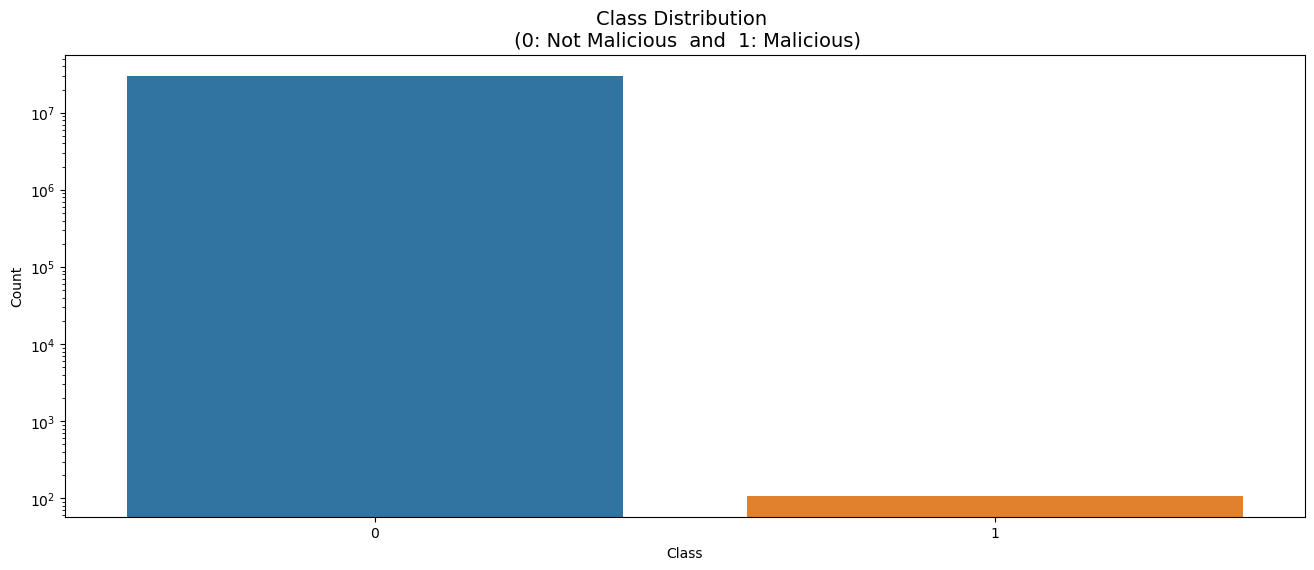

In [15]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='is_malicious', data=scaled_data, log=True)
plt.title('Class Distribution \n (0: Not Malicious  and  1: Malicious)', fontsize=14)
ax.set(xlabel='Class', ylabel='Count')
plt.show()


In [16]:
scaled_data.is_malicious.value_counts()

is_malicious
0    30248026
1         108
Name: count, dtype: int64

# Correlation Visual

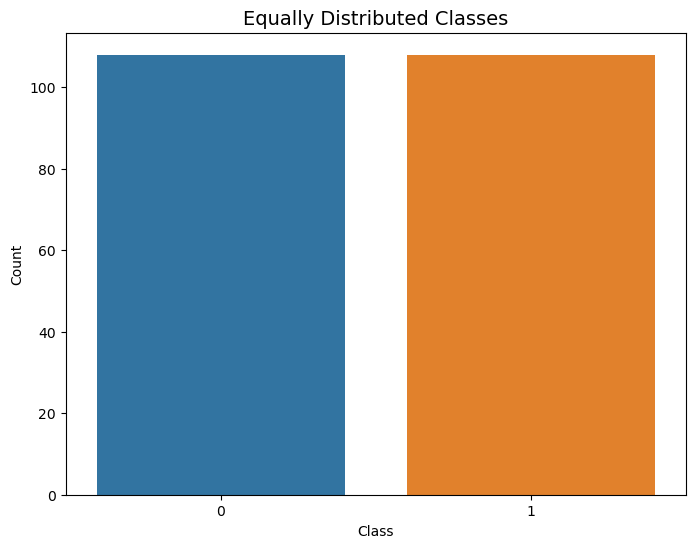

In [18]:
fraud_df = scaled_data[scaled_data['is_malicious'] == 1]
non_fraud_df = scaled_data[scaled_data['is_malicious'] == 0].sample(n=len(fraud_df), random_state=42)
new_df = pd.concat([fraud_df, non_fraud_df])

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_malicious', data=new_df)
ax.set(xlabel='Class', ylabel='Count')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()


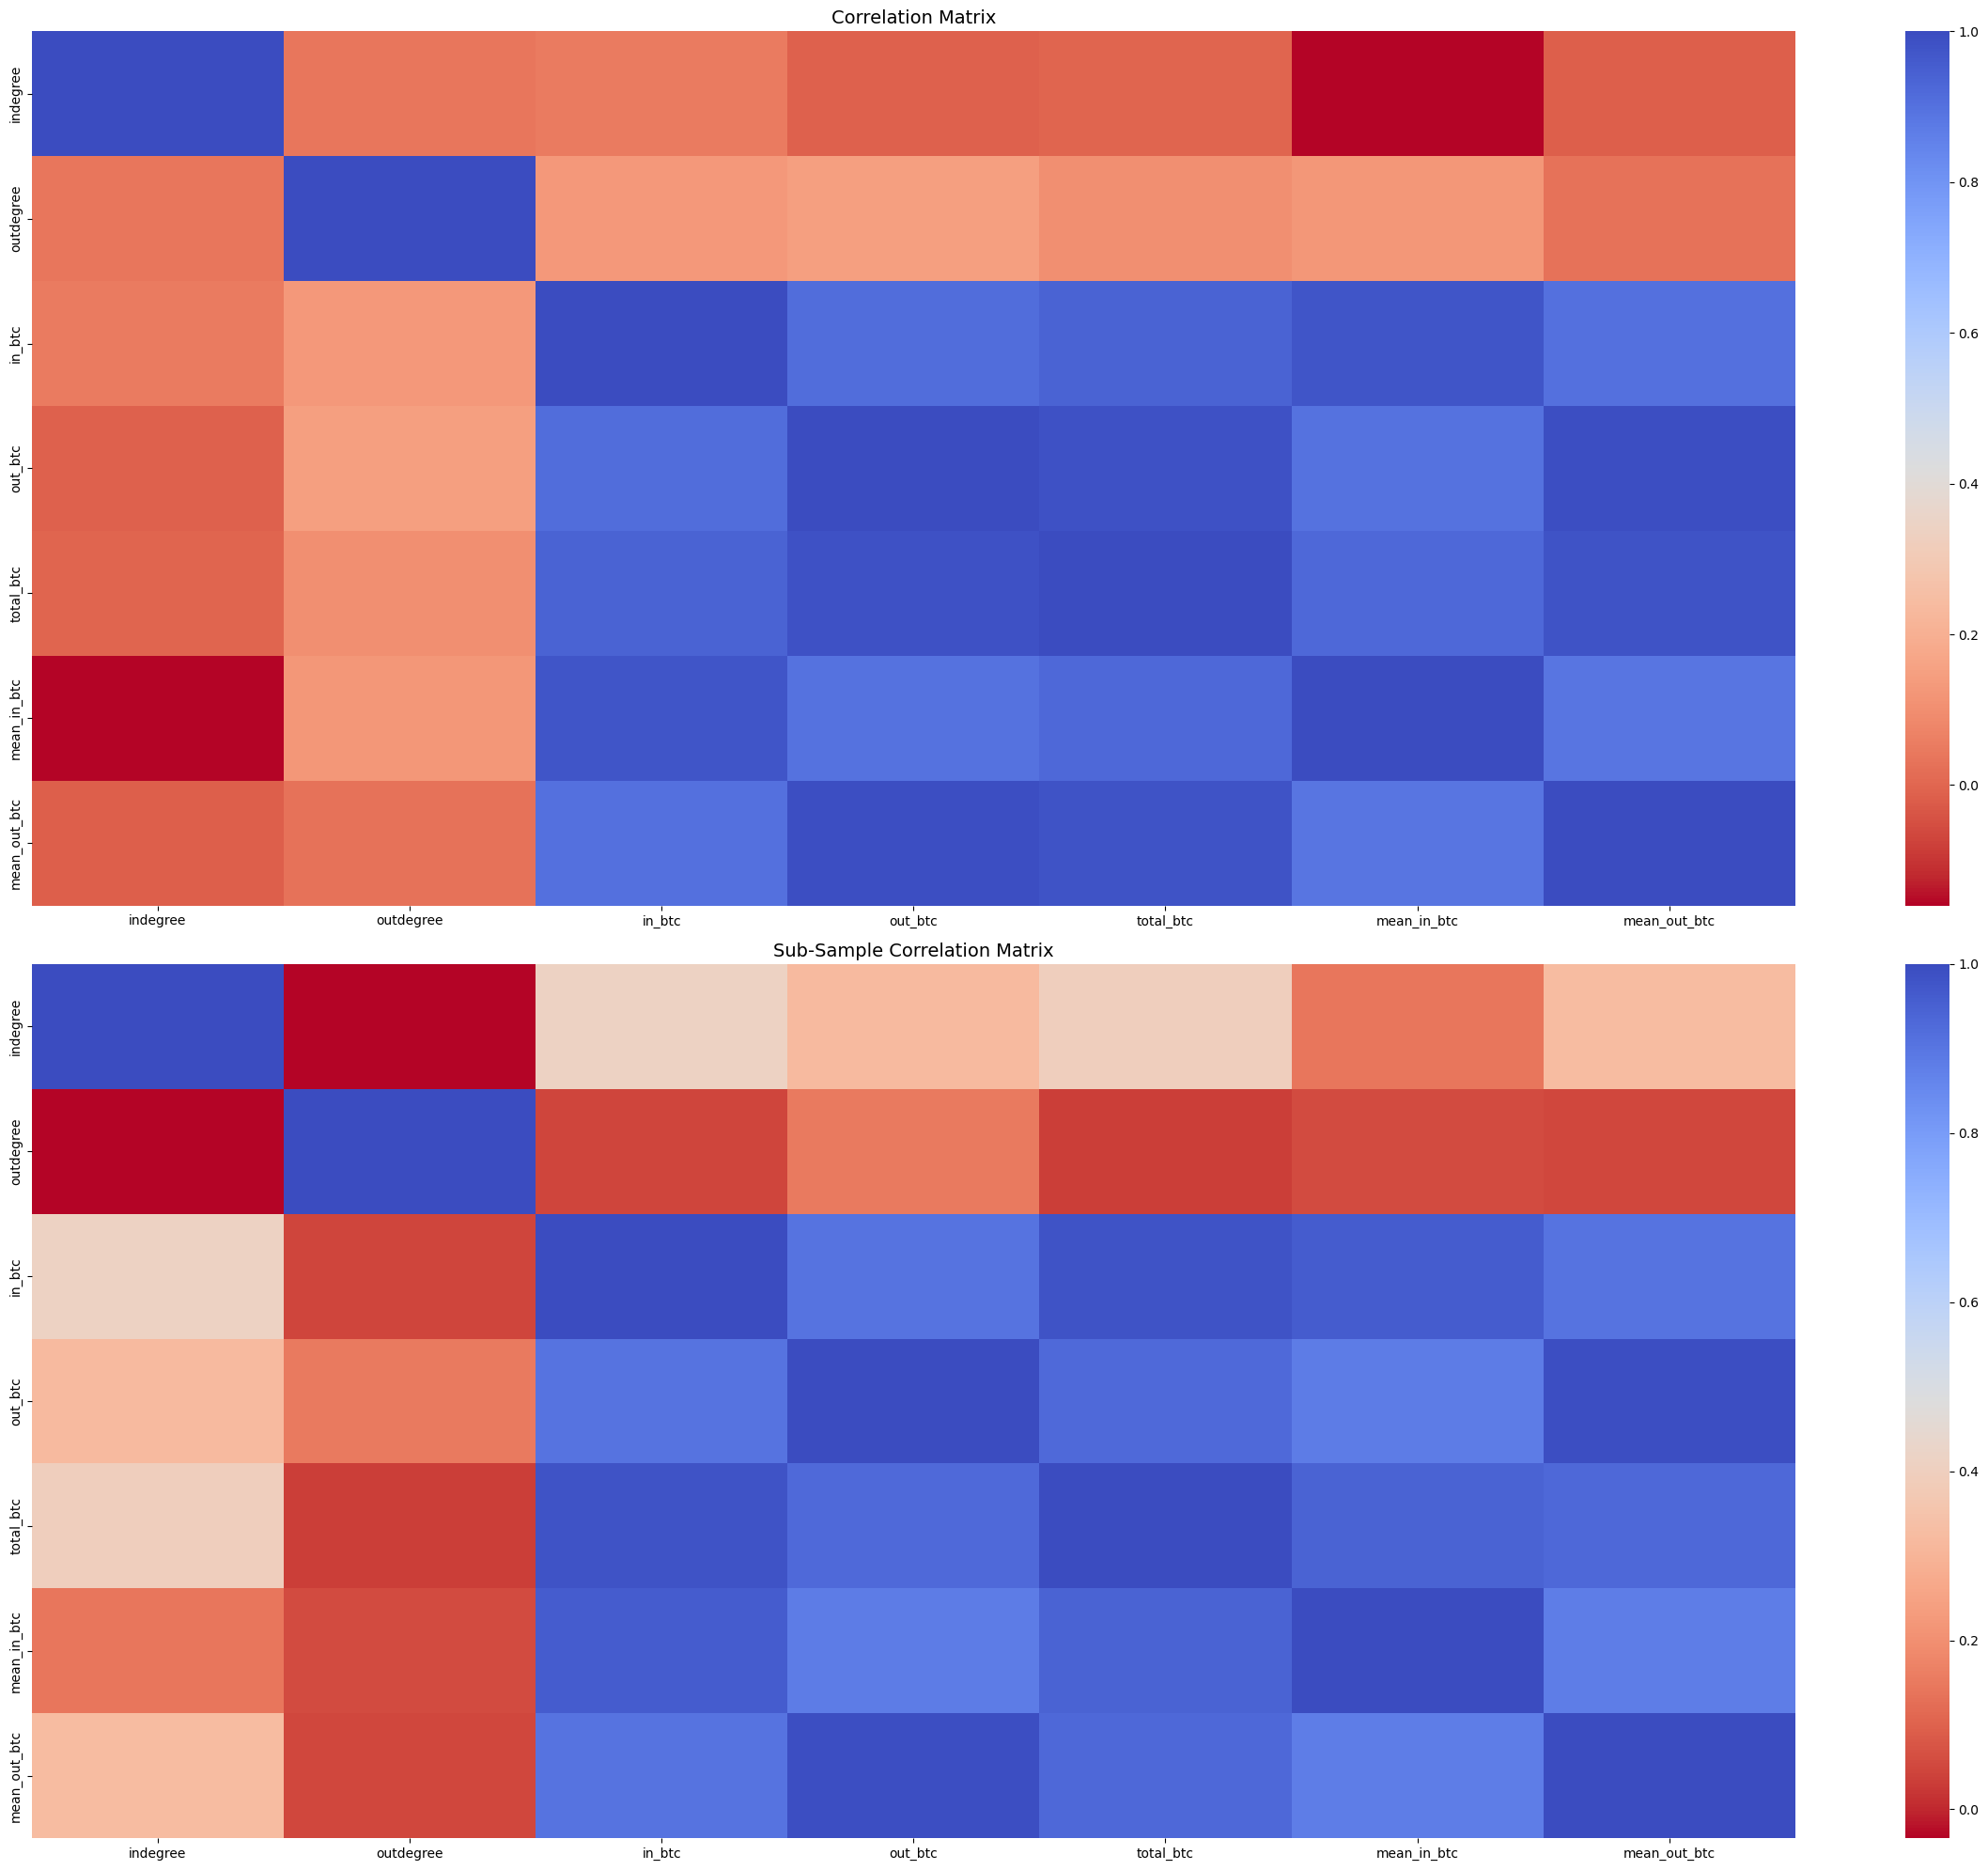

In [19]:
plt.figure(figsize=(24, 20))

# Entire DataFrame
corr = scaled_data.iloc[:, :7].corr()
plt.subplot(2, 1, 1)
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Correlation Matrix", fontsize=14)

# Sub-sample DataFrame
sub_sample_corr = new_df.iloc[:, :7].corr()
plt.subplot(2, 1, 2)
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Sub-Sample Correlation Matrix', fontsize=14)

plt.tight_layout()
plt.show()


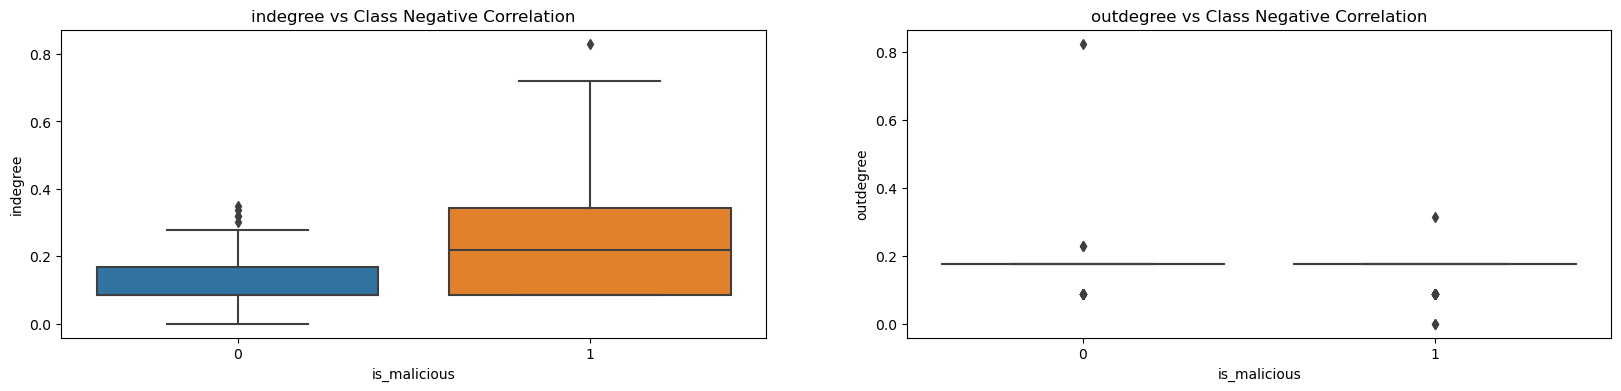

In [21]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x="is_malicious", y="indegree", data=new_df)
plt.title('indegree vs Class Negative Correlation')

plt.subplot(1, 2, 2)
sns.boxplot(x="is_malicious", y="outdegree", data=new_df)
plt.title('outdegree vs Class Negative Correlation')
plt.show()


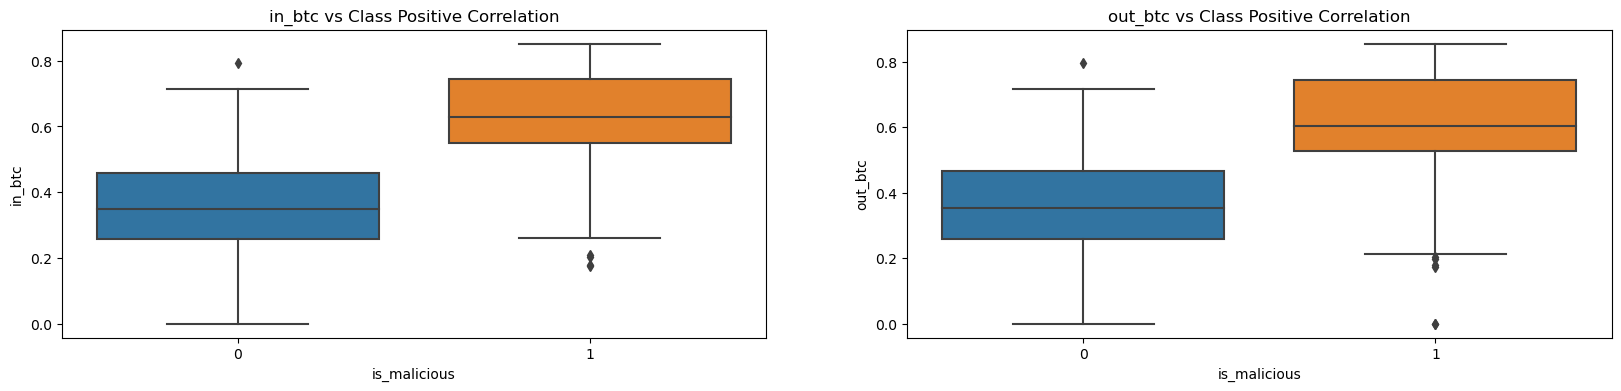

In [24]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x="is_malicious", y="in_btc", data=new_df)
plt.title('in_btc vs Class Positive Correlation')

plt.subplot(1, 2, 2)
sns.boxplot(x="is_malicious", y="out_btc", data=new_df)
plt.title('out_btc vs Class Positive Correlation')

plt.show()


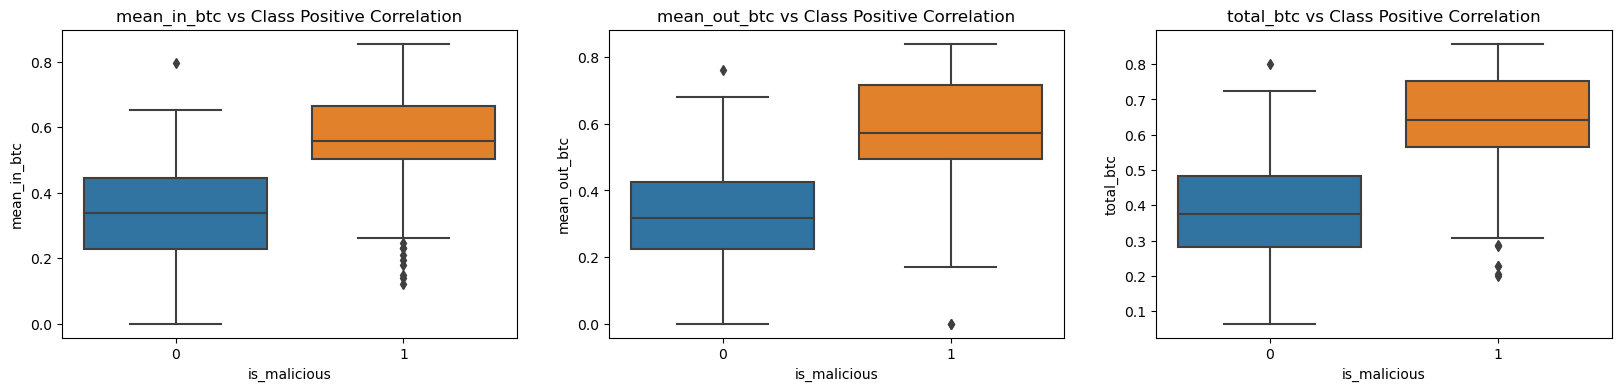

In [26]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x="is_malicious", y="mean_in_btc", data=new_df)
plt.title('mean_in_btc vs Class Positive Correlation')

plt.subplot(1, 3, 2)
sns.boxplot(x="is_malicious", y="mean_out_btc", data=new_df)
plt.title('mean_out_btc vs Class Positive Correlation')
plt.subplot(1, 3, 3)
sns.boxplot(x="is_malicious", y="total_btc", data=new_df)
plt.title('total_btc vs Class Positive Correlation')

plt.show()


# Pair Plot

In [27]:
scaled_data_pair = scaled_data.copy()
scaled_data_pair['is_malicious'] = scaled_data_pair['is_malicious'].replace({0: 'Non-malicious', 1: 'Malicious'})
scaled_data_pair.rename(columns={'is_malicious': 'Malicious-Transactions'}, inplace=True)
scaled_data_pair.head(5)


,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,Malicious-Transactions
0,0.000,0.088,0.000,0.556,0.536,0.000,0.556,Non-malicious
1,0.084,0.176,0.553,0.556,0.569,0.556,0.522,Non-malicious
2,0.084,0.088,0.476,0.478,0.494,0.478,0.478,Non-malicious
3,0.084,0.088,0.542,0.531,0.552,0.545,0.531,Non-malicious
4,0.084,0.176,0.528,0.531,0.545,0.531,0.497,Non-malicious
